In [2]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [4]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [5]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Flatten())
model.add(Dense(64))

In [10]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [12]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 57s 943us/step - loss: 0.4687 - acc: 0.8312
Epoch 2/5
60000/60000 [==============================] - 56s 938us/step - loss: 0.3158 - acc: 0.88621s - 
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.2769 - acc: 0.9000: 0s - loss: 0.2763 
Epoch 4/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2499 - acc: 0.9089
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2319 - acc: 0.9162


In [13]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 4s 353us/step
Test loss 0.2809347959756851
Test accuracy 0.8967


In [14]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

9


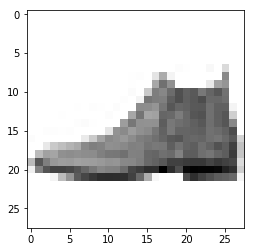

In [15]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()